In [76]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
%matplotlib inline
start_time = pd.datetime.now()

In [77]:
import pandas as pd
data=pd.read_csv('03_2010_df_625 Variables.csv')

In [78]:
data[data.Date<'2012-01-01'].shape

(35064, 625)

In [79]:
data = data.drop('Unnamed: 0',axis=1)

In [80]:
# #Separating catagorical and numerical columns
# binary_cols=['holiday','Temp.51.7.','DayTime','NightTime']
# other_cols=['Date','Hour','month','weekday','quarter','month.week','Day_Night_Time','Time_of_day']
# need_zscore   = [x for x in data.columns if x not in binary_cols+other_cols]

In [81]:
# for col in need_zscore:
#     data[col] = (data[col] - data[col].mean())/data[col].std(ddof=0)

In [82]:
box=pd.read_csv('04_Box_Cox_load.csv',index_col=False)

In [83]:
box=box.drop('Unnamed: 0',axis=1)

In [84]:
box.index=pd.Int64Index(box.index)

In [85]:
data.index=pd.Int64Index(data.index)

In [86]:
box_data=pd.merge(data, box, left_on=data.index,right_on=box.index,how='left')

In [87]:
box_data = box_data.drop('key_0',axis=1)

In [88]:
box_data[box_data['Date']>='2011-12-31']

,Date,Hour,Temperature,Load,month,weekday,Distance,TemperatureLag1,TemperatureLag2,TemperatureLag24,...,holiday.temp_mean_6_0.5,holiday.temp_mean_6_2,holiday.temp_mean_6_3,holiday.temp_mean_12_0.5,holiday.temp_mean_12_2,holiday.temp_mean_12_3,holiday.temp_mean_24_0.5,holiday.temp_mean_24_2,holiday.temp_mean_24_3,box
35040,2011-12-31,1,35.33,9970.0,December,Saturday,16.67,34.00,36.33,32.67,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.788346
35041,2011-12-31,2,34.67,9428.0,December,Saturday,17.33,35.33,34.00,34.33,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.282733
35042,2011-12-31,3,33.67,9059.0,December,Saturday,18.33,34.67,35.33,35.33,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.925719
35043,2011-12-31,4,32.33,8817.0,December,Saturday,19.67,33.67,34.67,37.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.685532
35044,2011-12-31,5,30.67,8743.0,December,Saturday,21.33,32.33,33.67,37.33,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.611087
35045,2011-12-31,6,30.33,8735.0,December,Saturday,21.67,30.67,32.33,39.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.603010
35046,2011-12-31,7,29.67,8993.0,December,Saturday,22.33,30.33,30.67,39.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.860702
35047,2011-12-31,8,29.67,9363.0,December,Saturday,22.33,29.67,30.33,39.67,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.220625
35048,2011-12-31,9,32.00,9545.0,December,Saturday,20.00,29.67,29.67,40.67,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.393714
35049,2011-12-31,10,34.00,9676.0,December,Saturday,18.00,32.00,29.67,41.33,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.516753


In [89]:
box_data.columns.values

array(['Date', 'Hour', 'Temperature', 'Load', 'month', 'weekday',
       'Distance', 'TemperatureLag1', 'TemperatureLag2',
       'TemperatureLag24', 'TemperatureLag48', 'Temperature_2_Lag',
       'Temperature_2_Lag1', 'Temperature_2_Lag2', 'Temperature_2_Lag24',
       'Temperature_2_Lag48', 'Temperature_3_Lag', 'Temperature_3_Lag1',
       'Temperature_3_Lag2', 'Temperature_3_Lag24', 'Temperature_3_Lag48',
       'Temperature_0.5_Lag', 'Temperature_0.5_Lag1',
       'Temperature_0.5_Lag2', 'Temperature_0.5_Lag24',
       'Temperature_0.5_Lag48', 'DistanceLag1', 'DistanceLag2',
       'DistanceLag24', 'DistanceLag48', 'Distance_2_Lag',
       'Distance_2_Lag1', 'Distance_2_Lag2', 'Distance_2_Lag24',
       'Distance_2_Lag48', 'Distance_3_Lag', 'Distance_3_Lag1',
       'Distance_3_Lag2', 'Distance_3_Lag24', 'Distance_3_Lag48',
       'Distance_0.5_Lag', 'Distance_0.5_Lag1', 'Distance_0.5_Lag2',
       'Distance_0.5_Lag24', 'Distance_0.5_Lag48', 'day', 'month.week',
       'quarter', 

In [90]:
box_data['Load_BoxCox']=box_data['box']

In [91]:
box_data = box_data.drop('box',axis=1)

In [92]:
sum(data.isnull().sum()>12)

225

In [93]:
box_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Hour,43848.0,12.500000,6.922265,1.000000,6.750000,12.500000,18.250000,2.400000e+01
Temperature,43848.0,50.334529,20.490564,-17.330000,34.330000,51.000000,67.000000,1.010000e+02
Load,35064.0,11639.447525,2317.204003,7223.000000,9962.000000,11450.000000,12811.000000,2.375300e+04
Distance,43848.0,17.300641,11.104868,0.000000,8.330000,16.330000,24.330000,6.933000e+01
TemperatureLag1,43847.0,50.335259,20.490228,-17.330000,34.330000,51.000000,67.000000,1.010000e+02
TemperatureLag2,43846.0,50.335966,20.489927,-17.330000,34.330000,51.000000,67.000000,1.010000e+02
TemperatureLag24,43824.0,50.346852,20.489070,-17.330000,34.330000,51.000000,67.000000,1.010000e+02
TemperatureLag48,43800.0,50.361783,20.483996,-17.330000,34.330000,51.000000,67.000000,1.010000e+02
Temperature_2_Lag,43848.0,2953.131173,2041.361709,-300.328900,1178.548900,2601.000000,4489.000000,1.020100e+04
Temperature_2_Lag1,43847.0,2953.193938,2041.342273,-300.328900,1178.548900,2601.000000,4489.000000,1.020100e+04


In [94]:
train_set = box_data[box_data['Date']<'2011-01-01']
test_set = box_data[(box_data['Date']>='2011-01-01') & (box_data['Date']<'2012-01-01')]

In [95]:
train_set=train_set.dropna()

In [96]:
# # plot x verses y for all x's if desired
# fig=plt.figure(figsize=(50,50))
# fig.suptitle('y~x distribution', fontsize=26)
# for i,col in enumerate(tset.columns):
#     z = np.polyfit(tset[col],tset['Load_BoxCox'],1)
#     p = np.poly1d(z)
#     ax=fig.add_subplot(61,22,i+1)
#     ax.plot(train_set[col],p(tset[col]),"r--")
#     ax.scatter(train_set[col],tset['Load_BoxCox'])
#     ax.set_xlabel(col)
#     ax.set_ylabel('y')
    
# plt.show()

In [97]:
# # look at correlation matrix if desired
# cormat = train_set.corr(method='pearson')
# cormat.style.background_gradient(cmap='pink_r').set_precision(2)

In [98]:
data_trntst=box_data[box_data['Date']<'2012-01-01'].drop(['Load_BoxCox','Date','Hour','month','weekday','quarter','month.week'],axis=1)

In [99]:
data_trntst = data_trntst.dropna()

In [100]:
X_trntst_save = data_trntst.drop(columns = 'Load').values
Y_trntst_save = data_trntst['Load'].values

In [101]:
# run PCA if desired
from sklearn.decomposition import PCA
# pca = PCA(n_components=10)
pca = PCA(30)

pca.fit(X_trntst_save)
print(pca.n_components_)

X_trntst_save = pca.transform(X_trntst_save)

30


In [102]:
X_trntst_save

array([[-1.81692015e+10,  6.93954638e+08, -8.51426222e+08, ...,
         1.01801282e+08,  7.10067881e+06,  3.40031247e+06],
       [-1.81992523e+10,  6.84339679e+08, -8.84523507e+08, ...,
         2.17655127e+08,  2.27190796e+07, -5.82809772e+06],
       [-1.82247730e+10,  6.80543016e+08, -9.13613771e+08, ...,
         2.83961344e+08,  2.58915639e+07, -8.00228115e+05],
       ...,
       [-1.31126917e+10,  3.22705128e+08, -9.59386486e+08, ...,
         5.76625823e+06, -2.17281562e+06,  1.42300688e+07],
       [-1.31734822e+10,  1.45910271e+08, -1.05483022e+09, ...,
         4.72400049e+06, -4.55567711e+06,  8.41705073e+06],
       [-1.33457267e+10, -1.25882839e+08, -1.13299538e+09, ...,
         2.29615815e+06, -7.39129389e+06,  2.11009483e+05]])

In [103]:
df_X_trntst_save=pd.DataFrame(X_trntst_save)

In [104]:
df_X_trntst_save

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-1.816920e+10,6.939546e+08,-8.514262e+08,-1.843797e+09,-1.968719e+09,2.785546e+09,2.067248e+09,1.076718e+09,-2.246383e+08,-1.964832e+08,...,-2.732485e+07,-2.855960e+07,-1.634883e+08,-9.138777e+07,1.931169e+07,2.407078e+07,-4.289975e+06,1.018013e+08,7.100679e+06,3.400312e+06
1,-1.819925e+10,6.843397e+08,-8.845235e+08,-1.889674e+09,-2.080858e+09,2.891148e+09,2.151096e+09,1.136855e+09,-2.271308e+08,-1.988130e+08,...,-2.717693e+07,-1.788202e+07,-1.495764e+08,-9.009869e+07,2.367402e+07,4.010457e+07,-3.321635e+07,2.176551e+08,2.271908e+07,-5.828098e+06
2,-1.822477e+10,6.805430e+08,-9.136138e+08,-1.926166e+09,-2.180803e+09,2.976557e+09,2.216226e+09,1.185102e+09,-2.359172e+08,-1.952410e+08,...,-4.756035e+07,-5.017530e+07,-3.049200e+08,-1.735826e+08,4.792284e+07,4.591672e+07,-3.843454e+07,2.839613e+08,2.589156e+07,-8.002281e+05
3,-1.824645e+10,7.071567e+08,-9.342742e+08,-1.985870e+09,-2.267629e+09,3.082183e+09,2.298401e+09,1.264184e+09,-2.316846e+08,-1.883280e+08,...,-4.257388e+07,-3.388409e+07,-2.442062e+08,-1.435109e+08,4.345990e+07,5.545367e+07,-6.030161e+07,3.540376e+08,3.781742e+07,-1.082236e+07
4,-1.825591e+10,7.186270e+08,-9.465370e+08,-2.013555e+09,-2.306244e+09,3.135564e+09,2.337734e+09,1.305422e+09,-2.281050e+08,-1.869023e+08,...,-3.972545e+07,-2.533362e+07,-2.092275e+08,-1.254266e+08,3.973324e+07,6.018644e+07,-7.102979e+07,3.865183e+08,4.396099e+07,-1.673044e+07
5,-1.827036e+10,7.255838e+08,-9.765519e+08,-2.069913e+09,-2.411364e+09,3.252661e+09,2.438528e+09,1.369022e+09,-2.375200e+08,-1.856793e+08,...,-3.226847e+07,-1.816401e+07,-1.734584e+08,-1.071468e+08,3.359536e+07,5.827473e+07,-7.305654e+07,3.767558e+08,4.316426e+07,-1.786687e+07
6,-1.828943e+10,7.135883e+08,-1.010358e+09,-2.099143e+09,-2.489601e+09,3.324930e+09,2.497198e+09,1.415800e+09,-2.399195e+08,-1.796740e+08,...,-3.062785e+07,-2.514460e+07,-1.957169e+08,-1.145265e+08,2.489588e+07,4.525635e+07,-5.021867e+07,2.777035e+08,2.905047e+07,-7.787334e+06
7,-1.829137e+10,7.217853e+08,-1.021294e+09,-2.115428e+09,-2.507395e+09,3.362874e+09,2.525786e+09,1.449094e+09,-2.339607e+08,-1.786093e+08,...,-1.908429e+07,-1.562909e+07,-1.247413e+08,-6.965057e+07,2.304513e+06,2.593659e+07,-1.790494e+07,1.196556e+08,1.098065e+07,-1.110086e+06
8,-1.828650e+10,7.007940e+08,-9.956030e+08,-2.036240e+09,-2.376884e+09,3.174345e+09,2.392365e+09,1.361594e+09,-2.030649e+08,-1.618758e+08,...,4.082585e+07,7.817202e+07,3.334269e+08,1.755360e+08,-5.438552e+07,1.808546e+07,-3.814560e+07,6.507065e+07,2.009614e+07,-3.301879e+07
9,-1.826042e+10,6.507666e+08,-9.108830e+08,-1.795836e+09,-2.017528e+09,2.644132e+09,1.984972e+09,1.092753e+09,-1.551218e+08,-1.224913e+08,...,1.043769e+08,1.836336e+08,8.260910e+08,4.319549e+08,-1.126312e+08,1.667135e+07,-7.287019e+07,6.253367e+07,3.790826e+07,-6.896050e+07


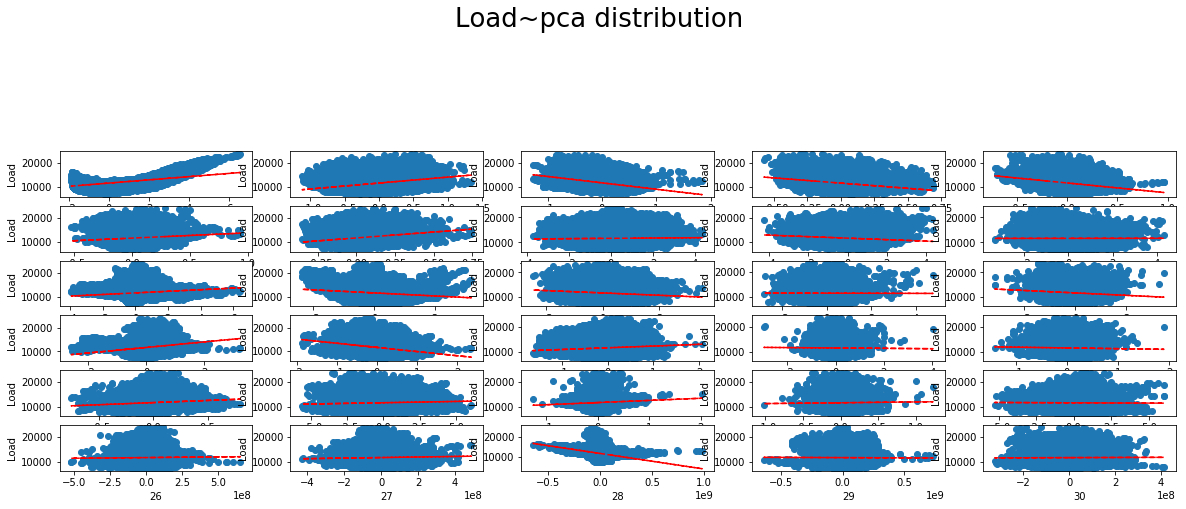

In [105]:
# plot pca verses y for all pca's if desired
fig=plt.figure(figsize=(20,20))
fig.suptitle('Load~pca distribution', fontsize=26)
for i,col in enumerate(df_X_trntst_save.columns):
    z = np.polyfit(df_X_trntst_save[col],data_trntst['Load'],1)
    p = np.poly1d(z)
    ax=fig.add_subplot(20,5,i+1)
    ax.plot(df_X_trntst_save[col],p(df_X_trntst_save[col]),"r--")
    ax.scatter(df_X_trntst_save[col],data_trntst['Load'])
    ax.set_xlabel(col+1)
    ax.set_ylabel('Load')
    
plt.show()

<BarContainer object of 30 artists>

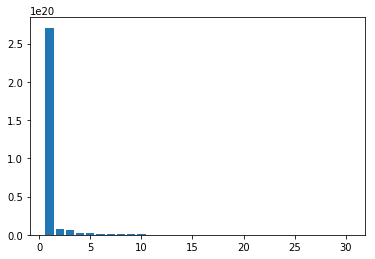

In [106]:
plt.bar(x=range(1, pca.n_components_+1),height=pca.explained_variance_)

In [130]:
X_trntst_save = data_trntst.drop(columns = 'Load').values
Y_trntst_save = data_trntst['Load'].values

In [131]:
# run PCA if desired
from sklearn.decomposition import PCA
# pca = PCA(n_components=10)
pca = PCA(10)

pca.fit(X_trntst_save)
print(pca.n_components_)

X_trntst_save = pca.transform(X_trntst_save)

10


In [132]:
X_trntst_save.shape

(35016, 10)

In [133]:
X_trntst = X_trntst_save
Y_trntst = Y_trntst_save

In [134]:
X_trntst.shape

(35016, 10)

In [135]:
X_trntst

array([[-1.81692015e+10,  6.93954638e+08, -8.51426222e+08, ...,
         1.07671779e+09, -2.24638264e+08, -1.96483250e+08],
       [-1.81992523e+10,  6.84339679e+08, -8.84523507e+08, ...,
         1.13685509e+09, -2.27130792e+08, -1.98812990e+08],
       [-1.82247730e+10,  6.80543016e+08, -9.13613771e+08, ...,
         1.18510219e+09, -2.35917227e+08, -1.95241039e+08],
       ...,
       [-1.31126917e+10,  3.22705128e+08, -9.59386486e+08, ...,
        -5.08868802e+08,  9.77704533e+07,  1.28505572e+08],
       [-1.31734822e+10,  1.45910271e+08, -1.05483022e+09, ...,
        -4.87384099e+08,  1.70922479e+08,  1.24744874e+08],
       [-1.33457267e+10, -1.25882839e+08, -1.13299538e+09, ...,
        -4.53117247e+08,  1.82959191e+08,  1.20651414e+08]])

In [120]:
nstop = 10
rsq_trn = pd.DataFrame(np.zeros((nstop, 4)), columns =['LR','NN','GB','RF'])
rsq_tst = pd.DataFrame(np.zeros((nstop, 4)), columns =['LR','NN','GB','RF'])
rsq_validate = pd.DataFrame(np.zeros((1, 4)), columns =['LR','NN','GB','RF'])

In [121]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true))

for n in range(nstop):
    X_trn, X_tst, Y_trn, Y_tst = train_test_split(X_trntst, Y_trntst, test_size = .2)
    X_trn_save = X_trn.copy()
    X_tst_save = X_tst.copy()
    Y_trn_save = Y_trn.copy()
    Y_tst_save = Y_tst.copy()
 

# Linear regression
    LR = LinearRegression(copy_X=True).fit(X_trn,Y_trn) #copy_X : boolean, optional, default True. If True, X will be copied; else, it may be overwritten.
    predict_LR_trn = LR.predict(X_trn)
    predict_LR_tst = LR.predict(X_tst)
    rsq_trn.loc[n,'LR'] = mean_absolute_percentage_error(Y_trn,predict_LR_trn)
    rsq_tst.loc[n,'LR'] = mean_absolute_percentage_error(Y_tst,predict_LR_tst)

    X_trn = X_trn_save
    X_tst = X_tst_save
    Y_trn = Y_trn_save
    Y_tst = Y_tst_save
    

# Neural net   
    NN = MLPRegressor(hidden_layer_sizes=(8,2),activation='tanh',solver='adam',
                      learning_rate='adaptive',max_iter=10000,learning_rate_init=.01,alpha=.01)
    NN.fit(X_trn,Y_trn)
    predict_NN_trn = NN.predict(X_trn)
    predict_NN_tst = NN.predict(X_tst)
    rsq_trn.loc[n,'NN'] = mean_absolute_percentage_error(Y_trn,predict_NN_trn)
    rsq_tst.loc[n,'NN'] = mean_absolute_percentage_error(Y_tst,predict_NN_tst)

    X_trn = X_trn_save
    X_tst = X_tst_save
    Y_trn = Y_trn_save
    Y_trn = Y_trn_save
    

# Gradient boosting tree    
    params = {'n_estimators':300, 'max_depth':4, 'min_samples_split':20, 'learning_rate':.2, 
              'loss':'ls'}
    GB = GradientBoostingRegressor(**params)
    GB.fit(X_trn,Y_trn)
    predict_GB_trn = GB.predict(X_trn)
    predict_GB_tst = GB.predict(X_tst)
    rsq_trn.loc[n,'GB'] = mean_absolute_percentage_error(Y_trn,predict_GB_trn)
    rsq_tst.loc[n,'GB'] = mean_absolute_percentage_error(Y_tst,predict_GB_tst)

    X_trn = X_trn_save
    X_tst = X_tst_save
    Y_trn = Y_trn_save
    Y_tst = Y_tst_save
   

# Random forest
    RF = RandomForestRegressor(n_estimators=15, max_depth=20)    
    RF.fit(X_trn,Y_trn)
    predict_RF_trn = RF.predict(X_trn)
    predict_RF_tst = RF.predict(X_tst)
    rsq_trn.loc[n,'RF'] = mean_absolute_percentage_error(Y_trn,predict_RF_trn)
    rsq_tst.loc[n,'RF'] = mean_absolute_percentage_error(Y_tst,predict_RF_tst)
    
    print('loop', n)
    print("training: ",rsq_trn.loc[n,'LR'],rsq_trn.loc[n,'NN'],rsq_trn.loc[n,'GB'],rsq_trn.loc[n,'RF'])
    print("testing: ",rsq_tst.loc[n,'LR'],rsq_tst.loc[n,'NN'],rsq_tst.loc[n,'GB'],rsq_tst.loc[n,'RF'])

loop 0
training:  0.11444556182574635 0.1530567168178295 0.07159701793316164 0.031724220928881657
testing:  0.11518154016116113 0.15112052216523986 0.07938167967107929 0.0708593017949263
loop 1
training:  0.11410318179676712 0.15263756721987587 0.07077447861303118 0.03158491003613666
testing:  0.11680521862406762 0.15280940190406148 0.08092309014887827 0.07235560720261244
loop 2
training:  0.1146612737740868 0.15240678597216512 0.07078476409166536 0.03133990877629622
testing:  0.11459456832085574 0.15279035355430723 0.07999046924143437 0.07223867442150476
loop 3
training:  0.11449127775431822 0.15295308043355715 0.07103858689791567 0.03167801099521889
testing:  0.11530182896267642 0.1526339773412015 0.08013070118454182 0.07286617903959151
loop 4
training:  0.11450613249824103 0.15294094001181124 0.07079557102516625 0.031423866193961016
testing:  0.11538630814099252 0.15210967452808805 0.0803379423890619 0.07142002388183843
loop 5
training:  0.11436130381979241 0.1524687347709272 0.0714

In [122]:
rsq_tst

,LR,NN,GB,RF
0,0.115182,0.151121,0.079382,0.070859
1,0.116805,0.152809,0.080923,0.072356
2,0.114595,0.152790,0.079990,0.072239
3,0.115302,0.152634,0.080131,0.072866
4,0.115386,0.152110,0.080338,0.071420
5,0.116253,0.154456,0.079956,0.071566
6,0.114295,0.154835,0.079959,0.071955
7,0.116224,0.154717,0.080189,0.072780
8,0.115443,0.154773,0.079765,0.071010
9,0.112898,0.152352,0.078471,0.070282


In [123]:
print('LR:', rsq_trn['LR'].mean(), rsq_tst['LR'].mean())
print('NN:', rsq_trn['NN'].mean(), rsq_tst['NN'].mean())
print('GB:', rsq_trn['GB'].mean(), rsq_tst['GB'].mean())
print('RF:', rsq_trn['RF'].mean(), rsq_tst['RF'].mean())

LR: 0.11452338974129435 0.11523828048240221
NN: 0.15259981879831305 0.15325971386979315
GB: 0.07118598090652194 0.07991038112127417
RF: 0.03166819178277398 0.07173321630944289


In [171]:
X_trntst_save = data_trntst.drop(columns = 'Load').values
Y_trntst_save = data_trntst['Load'].values

In [172]:
# run PCA if desired
from sklearn.decomposition import PCA
# pca = PCA(n_components=10)
pca = PCA(200)

pca.fit(X_trntst_save)
print(pca.n_components_)

X_trntst_save = pca.transform(X_trntst_save)

200


In [173]:
X_trntst_save.shape

(35016, 200)

In [174]:
X_trntst = X_trntst_save
Y_trntst = Y_trntst_save

In [175]:
X_trntst.shape

(35016, 200)

In [176]:
Y_trntst.shape

(35016,)

In [177]:
X_trntst = pd.DataFrame(X_trntst)
Y_trntst = data_trntst['Load']

X_train_set = X_trntst.iloc[:26256,:]
X_test_set = X_trntst.iloc[26257:,:]
Y_train_set = Y_trntst.iloc[:26256]
Y_test_set = Y_trntst.iloc[26257:]

In [178]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true))

In [179]:
nstop = 0
rsq_trn = pd.DataFrame(np.zeros((nstop, 4)), columns =['LR','NN','GB','RF'])
rsq_tst = pd.DataFrame(np.zeros((nstop, 4)), columns =['LR','NN','GB','RF'])
rsq_validate = pd.DataFrame(np.zeros((1, 4)), columns =['LR','NN','GB','RF'])

In [180]:
# Linear regression
LR = LinearRegression(copy_X=True).fit(X_train_set,Y_train_set) #copy_X : boolean, optional, default True. If True, X will be copied; else, it may be overwritten.
predict_LR_trn = LR.predict(X_train_set)
predict_LR_tst = LR.predict(X_test_set)
rsq_trn.loc[n,'LR'] = mean_absolute_percentage_error(Y_train_set,predict_LR_trn)
rsq_tst.loc[n,'LR'] = mean_absolute_percentage_error(Y_test_set,predict_LR_tst)

# Neural net   
NN = MLPRegressor(hidden_layer_sizes=(8,2),activation='tanh',solver='adam',
                      learning_rate='adaptive',max_iter=10000,learning_rate_init=.01,alpha=.01)
NN.fit(X_train_set,Y_train_set)
predict_NN_trn = NN.predict(X_train_set)
predict_NN_tst = NN.predict(X_test_set)
rsq_trn.loc[n,'NN'] = mean_absolute_percentage_error(Y_train_set,predict_NN_trn)
rsq_tst.loc[n,'NN'] = mean_absolute_percentage_error(Y_test_set,predict_NN_tst)

# Gradient boosting tree    
params = {'n_estimators':300, 'max_depth':4, 'min_samples_split':20, 'learning_rate':.2, 
          'loss':'ls'}
GB = GradientBoostingRegressor(**params)
GB.fit(X_train_set,Y_train_set)
predict_GB_trn = GB.predict(X_train_set)
predict_GB_tst = GB.predict(X_test_set)
rsq_trn.loc[n,'GB'] = mean_absolute_percentage_error(Y_train_set,predict_GB_trn)
rsq_tst.loc[n,'GB'] = mean_absolute_percentage_error(Y_test_set,predict_GB_tst)

# Random forest
RF = RandomForestRegressor(n_estimators=15, max_depth=20)    
RF.fit(X_train_set,Y_train_set)
predict_RF_trn = RF.predict(X_train_set)
predict_RF_tst = RF.predict(X_test_set)
rsq_trn.loc[n,'RF'] = mean_absolute_percentage_error(Y_train_set,predict_RF_trn)
rsq_tst.loc[n,'RF'] = mean_absolute_percentage_error(Y_test_set,predict_RF_tst)
    
print("training: ",rsq_trn.loc[n,'LR'],rsq_trn.loc[n,'NN'],rsq_trn.loc[n,'GB'],rsq_trn.loc[n,'RF'])
print("testing: ",rsq_tst.loc[n,'LR'],rsq_tst.loc[n,'NN'],rsq_tst.loc[n,'GB'],rsq_tst.loc[n,'RF'])

training:  0.03519324057299123 0.15181316327437966 0.021195344368055768 0.014438934808179066
testing:  0.03727629687835895 0.15507734927614442 0.0375144167446771 0.04519847698560315


In [ ]:
#5
training:  0.11408737751035912 0.15181824020966775 0.06960934309875973 0.030243763290022537
testing:  0.11755673701277496 0.15508364177285666 0.08558526737600955 0.08761962591605488

In [140]:
#10
training:  0.10562199108958999 0.15181345876453198 0.04912017985178131 0.021759766658248067
testing:  0.10649094076467103 0.1550777155149689 0.06576603244425373 0.06774600475358222

,LR,NN,GB,RF
0,0.000000,0.000000,0.000000,0.000000
9,0.106491,0.155078,0.065766,0.067746


In [ ]:
#15
training:  0.1004273965272443 0.151816967766916 0.04170914219838883 0.01933692729746594
testing:  0.10083497224482972 0.15508206467144064 0.05957420980479621 0.06282988781357814

In [ ]:
#100
training:  0.05224495171018305 0.15180624376223356 0.024730067966461624 0.014734706801639517
testing:  0.057507987927436846 0.15506877303773303 0.04043980156581495 0.04546392024927914

In [ ]:
#200
training:  0.03519324057299123 0.15181316327437966 0.021195344368055768 0.014438934808179066
testing:  0.03727629687835895 0.15507734927614442 0.0375144167446771 0.04519847698560315